In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt
df=pd.read_csv('Housing_data.csv')
df1=pd.read_csv('Housing_data.csv')
print(df.head())

   Unnamed: 0    price  lotsize  bedrooms  bathrms  stories driveway recroom  \
0           1  42000.0     5850         3        1        2      yes      no   
1           2  38500.0     4000         2        1        1      yes      no   
2           3  49500.0     3060         3        1        1      yes      no   
3           4  60500.0     6650         3        1        2      yes     yes   
4           5  61000.0     6360         2        1        1      yes      no   

  fullbase gashw airco  garagepl prefarea  
0      yes    no    no         1       no  
1       no    no    no         0       no  
2       no    no    no         0       no  
3       no    no    no         0       no  
4       no    no    no         0       no  


In [73]:
df1.drop(['Unnamed: 0','price','stories','driveway','recroom','fullbase','gashw','airco','garagepl','prefarea'],axis=1,inplace=True)

In [74]:
X1=df1['lotsize'].to_numpy()
Y1=df1['bedrooms'].to_numpy()
Z1=df1['bathrms'].to_numpy()
X=df1.to_numpy()

In [75]:
y=df['price'].to_numpy()
print(y)

[ 42000.  38500.  49500.  60500.  61000.  66000.  66000.  69000.  83800.
  88500.  90000.  30500.  27000.  36000.  37000.  37900.  40500.  40750.
  45000.  45000.  48500.  65900.  37900.  38000.  42000.  42300.  43500.
  44000.  44500.  44900.  45000.  48000.  49000.  51500.  61000.  61000.
  61700.  67000.  82000.  54500.  66500.  70000.  82000.  92000.  38000.
  44000.  41000.  43000.  48000.  54800.  55000.  57000.  68000.  95000.
  38000.  25000.  25245.  56000.  35500.  30000.  48000.  48000.  52000.
  54000.  56000.  60000.  60000.  67000.  47000.  70000.  45000.  51000.
  32500.  34000.  35000.  36000.  45000.  47000.  55000.  63900.  50000.
  35000.  50000.  43000.  55500.  57000.  60000.  78000.  35000.  44000.
  47000.  58000. 163000. 128000. 123500.  39000.  53900.  59900.  35000.
  43000.  57000.  79000. 125000. 132000.  58000.  43000.  48000.  58500.
  73000.  63500.  43000.  46500.  92000.  75000.  75000.  85000.  93000.
  94500. 106500. 116000.  61500.  80000.  37000.  5

In [76]:
def fitTheta(feature, theta):
    return np.dot(theta, feature)
def visualiseFeature(feature, featureLabel, thetaVal=None):
    fig = plt.figure(figsize=(20, 10))
    plt.rcParams.update({'font.size': 10})
    plt.xlabel(featureLabel, fontsize=15)
    plt.ylabel("Price", fontsize=15)
    plt.scatter(feature, y, color="red")
    if(thetaVal):
        thetaFit = fitTheta(feature, thetaVal)
        plt.plot(feature, thetaFit)

/home/amritansh/.local/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:761: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/amritansh/.local/lib/python3.6/site-packages/mpl_toolkits/mplot3d/art3d.py:763: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


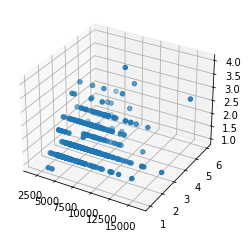

In [77]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(X1,Y1,Z1,y)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [79]:
def gradient_descent(alpha, x,x2,x3, y,lambd, ep=0.2, max_iter=1000):
    converged = False
    iter = 0
    m = x.shape[0] 
    t0 = 0
    t1 = 0
    t2 = 0
    t3 = 0
    J = sum([(t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])**2 for i in range(m)])
    
    while not converged:
        grad0 = 1.0/m * sum([(t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])*x[i] for i in range(m)])
        grad2 = 1.0/m * sum([(t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])*x2[i] for i in range(m)])
        grad3 = 1.0/m * sum([(t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])*x3[i] for i in range(m)])
        k=1.0*alpha
        k=k*lambd
        k=k/m
        print(k)
        temp0 = (t0-k) - alpha * grad0
        temp1 = (t1-k) - alpha * grad1
        temp2 = (t2-k) - alpha * grad2
        temp3 = (t3-k) - alpha * grad3
        t0 = temp0
        t1 = temp1
        t2=temp2
        t3=temp3
        e = sum( [ (t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])**2 for i in range(m)]) 
        if abs(J-e) <= ep:
            converged = True    
        J = e   
        iter += 1  
        if iter == max_iter:
            converged = True
    return [t0,t1,t2,t3]

In [80]:
alpha=0.000000001
lambd=10000000000
theta=gradient_descent(alpha,X_train[:,0],X_train[:,1],X_train[:,2],y_train,lambd)
print(theta[1])

0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419


0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419


0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419
0.02617801047120419


In [81]:
#print(theta)
l=[]
k=0
for i in X_test:
    l.append(theta[0]+theta[1]*i[0]+theta[2]*i[1]+theta[3]*i[2])
    3#k+=1
normal_predictions = np.array(l)
print(normal_predictions)

[ 75142.44962751  90449.71965908  95703.18600661  63700.45791372
  43546.28976811  59925.18145993  50051.38150387  70263.63082569
  77930.34608569  42358.52397326  34717.95098387  41687.69212932
  58415.07087842 102995.2537209   29490.64512478  82957.24792771
  45869.5368166   86267.8749718   89340.39889388  63203.86959842
  74445.47551297  86938.68859791  68962.61247854  45869.5368166
  54439.40862538  63758.53908993  42010.01869816  93934.60844963
  33672.48981205  52090.00108846  55827.56021948  57840.03753346
  42126.19926841  56504.17048058  49328.26511871  32368.54344694
  55278.68736296  42283.02992681  36893.09677433  30109.15599183
 104363.05967938  78304.97541358  60247.52624659  47263.48504569
  72464.87770367 119156.36496106  78885.7871757   24960.31338023
 149718.67988389 153229.69272723  62544.63102447  39622.9120563
  76536.3978566   94515.40199393  57343.46743599  44591.75093993
  62132.26615599  39945.25684296 132436.63164328  75639.01972498
  37479.70517144  47251.868

In [82]:
n1=normal_predictions.astype(int)
a=np.subtract(y_test,normal_predictions)
b=np.absolute(a)
c=np.divide(b,y_test)
error=np.mean(c)
print(error)

0.2945192177115294


In [83]:
def stoch_gradient_descent(alpha, x,x2,x3, y, ep=0.2, max_iter=1000):
    converged = False
    iter = 0
    m = x.shape[0] 
    t0 = 0
    t1 = 0
    t2 = 0
    t3 = 0
    J = sum([(t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])**2 for i in range(m)])
    while not converged:
        for i in range(m):
            grad0 = 1.0 * (t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i]) 
            grad1 = 1.0 * (t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])*x[i] 
            grad2 = 1.0 * (t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])*x2[i] 
            grad3 = 1.0 * (t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])*x3[i]
            k=1.0*alpha
            k=k*lambd
            k=k/m
            #print(k)
            temp0 = (t0-k) - alpha * grad0
            temp1 = (t1-k) - alpha * grad1
            temp2 = (t2-k) - alpha * grad2
            temp3 = (t3-k) - alpha * grad3
            t0 = temp0
            t1 = temp1
            t2=temp2
            t3=temp3
            #e = sum( [ (t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])**2 for i in range(m)])
            #i+=1
        if iter == max_iter:
            converged = True
        iter += 1  
    return [t0,t1,t2,t3]

In [111]:
alpha=0.000000001
lambd=10000000
theta=stoch_gradient_descent(alpha,X_train[:,0],X_train[:,1],X_train[:,2],y_train,lambd)

In [112]:
l=[]
k=0
for i in X_test:
    l.append(theta[0]+theta[1]*i[0]+theta[2]*i[1]+theta[3]*i[2])
    3#k+=1
normal_predictions = np.array(l)
print(normal_predictions)

[ 79649.65011435  95873.35335565 101412.96718838  67538.42564095
  46205.45664465  63542.33634769  53091.02588841  74485.47318153
  82600.60836168  44972.14475122  36860.75552812  44238.15114644
  61943.90063039 109152.66546861  31327.70881438  87942.65306596
  48664.58851743  91446.91598466  94654.1004953   66988.86692662
  78911.91055252  92178.08842749  73108.35933278  48664.58851743
  57759.63048964  67599.90393777  44600.45380836  99564.87232676
  35754.14618537  55293.93149787  59181.12323057  61380.28288298
  44726.23156395  59966.28205613  52349.54036954  34395.05653635
  58624.07260215  44844.38441231  39139.19846748  32048.56818118
 110624.39863523  82973.22409964  63907.46017157  50140.06764109
  76860.51802208 126237.90344401  83588.00706783  26532.40166248
 158587.78323032 162280.22699653  66362.84608729  42028.67841799
  81125.12923801 100176.834133    60833.5453306   47312.0659874
  65878.51162683  42393.80224186 140270.99673522  80196.38766673
  39807.9678184   50127.77

In [113]:
n1=normal_predictions.astype(int)
a=np.subtract(y_test,normal_predictions)
b=np.absolute(a)
c=np.divide(b,y_test)
error=np.mean(c)
print(error)

0.2920570998272809


In [92]:
def mini_batch_gradient_descent(alpha, x,x2,x3, y, ep=0.2, max_iter=1000):
    converged = False
    iter = 0
    m = x.shape[0] 
    t0 = 0
    t1 = 0
    t2 = 0
    t3 = 0
    J = sum([(t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])**2 for i in range(m)])
    k=0
    while not converged:
        grad0 = 1.0/m * sum([(t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i]) for i in range(k,k+10)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])*x[i] for i in range(k,k+10)])
        grad2 = 1.0/m * sum([(t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])*x2[i] for i in range(k,k+10)])
        grad3 = 1.0/m * sum([(t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])*x3[i] for i in range(k,k+10)])
        p=1.0*alpha
        p=p*lambd
        p=p/m
        #print(k)
        temp0 = (t0-p) - alpha * grad0
        temp1 = (t1-p) - alpha * grad1
        temp2 = (t2-p) - alpha * grad2
        temp3 = (t3-p) - alpha * grad3
        t0 = temp0
        t1 = temp1
        t2=temp2
        t3=temp3
        #e = sum( [ (t0 + t1*x[i]+ t2*x2[i]+t3*x3[i]- y[i])**2 for i in range(m)]) 
        #if abs(J-e) <= ep:
            #converged = True
        if k+10>=m:
            k=0
        #J = e   
        iter += 1  
        if iter == max_iter:
            converged = True
    return [t0,t1,t2,t3]

In [96]:
alpha=0.000000001
lambd=100000
theta=mini_batch_gradient_descent(alpha,X_train[:,0],X_train[:,1],X_train[:,2],y_train,lambd)

In [97]:
l=[]
k=0
for i in X_test:
    l.append(theta[0]+theta[1]*i[0]+theta[2]*i[1]+theta[3]*i[2])
    3#k+=1
normal_predictions = np.array(l)
print(normal_predictions)

[ 41629.51488737  50109.60000005  53000.53552211  35301.57402566
  24155.40408143  33213.67475657  27753.01512971  38931.30660116
  43171.34819377  23512.97774873  19272.93194448  23127.5152105
  32378.51504893  57047.84987888  16381.99449497  45965.92298909
  25440.2651701   47796.85004044  49467.16331663  35012.47606907
  41244.05656076  48182.3102945   38211.7843915   25440.2651701
  30194.25540983  35333.69555288  23320.24630125  52036.89391724
  18694.74445458  28909.39624861  30933.04211254  32089.42744307
  23384.49163987  31350.63231709  27367.56101475  17988.07278326
  30643.95257922  23442.30196558  20461.42423986  16767.46088812
  57818.77074372  43364.07314544  33406.40813151  26211.18182331
  40177.62799626  65971.20821225  43685.2884176   13876.51537206
  82873.55583372  84800.84325509  34691.27343181  21971.13601905
  42400.43154057  52358.10690523  31800.33177067  24733.59157133
  34434.29279081  22163.86939399  73301.33651148  41918.61055977
  20814.76946252  26204.757

In [98]:
n1=normal_predictions.astype(int)
a=np.subtract(y_test,normal_predictions)
b=np.absolute(a)
c=np.divide(b,y_test)
error=np.mean(c)
print(error)

0.5020648908735008
